Task-1
	You need to translate each word or sentence from English to Spanish, French and German 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files = files.upload()

Saving English.csv to English.csv


In [ ]:
df=pd.read_csv('English.csv')
df.rename(columns = {'English words/sentences':'English_words'}, inplace = True)
df.head()

,English_words
0,Hi.
1,Run!
2,Run!
3,Who?
4,Wow!


In [ ]:
df.tail()

,English words
175616,"Top-down economics never works, said Obama. ""T..."
175617,A carbon footprint is the amount of carbon dio...
175618,Death is something that we're often discourage...
175619,Since there are usually multiple websites on a...
175620,If someone who doesn't know your background sa...


In [ ]:
df.shape

(175621, 1)

In [ ]:
df.isnull().sum()

English words    0
dtype: int64

Translating sentences from English to Spanish

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 1.4 MB 9.6 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=e3642f43321c487e15cdef0f28c43ee485284532b5d5d53d4e12b74bf86dd574
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
import googletrans
from googletrans import Translator
translator = Translator()
#translate_text = translator.translate(df['English words/sentences'],lang_tgt='es')
#print(translate_text)
#translate_text.text

In [ ]:
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [ ]:
df['translated_value_Spanish'] = df['English words'].apply(lambda x: translator.translate(x, dest='es').text)
df['translated_value_Spanish']

Translating sentences from English to German

In [ ]:
df['translated_value_German'] = df['English words'].apply(lambda x: translator.translate(x, dest='de').text)
df['translated_value_German']

Translating sentences from English to French

In [ ]:
df['translated_value_French'] = df['English words'].apply(lambda x: translator.translate(x, dest='fr').text)
df['translated_value_French']

Task-2
	Create a program that needs to automatically correct that spelling from the word or a given sentence. (Language : English) 
Note:  show 100 data point outputs both in words and sentence. 


In [ ]:
!pip install textdistance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Replacing punctuation with space
df['English_words_processed'] = df['English_words'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
df = df[['English_words','English_words_processed']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df['English_words_processed']

0                                                       Hi 
1                                                      Run 
2                                                      Run 
3                                                      Who 
4                                                      Wow 
                                ...                        
175616    Top down economics never works  said Obama   T...
175617    A carbon footprint is the amount of carbon dio...
175618    Death is something that we re often discourage...
175619    Since there are usually multiple websites on a...
175620    If someone who doesn t know your background sa...
Name: English_words_processed, Length: 175621, dtype: object

In [ ]:
# Frquency Count
vc_df = pd.DataFrame(df['English_words'].value_counts()).reset_index()
vc_df.columns = ['English words', 'Count'] 
vc_df

,English words,Count
0,I can't tell you how happy I am that you've co...,32
1,You gotta get more organized.,26
2,You're the teacher.,26
3,You don't have to apologize.,24
4,You need to be more patient.,24
...,...,...
123095,Is the hotel far from here?,1
123096,Is that the best we can do?,1
123097,Is that really appropriate?,1
123098,Is that only a coincidence?,1


In [ ]:
#make the entire sentences in lower case
df['English_words_processed'] = [English_words.lower() for English_words in df['English_words_processed']]
df['English_words_processed']

0                                                       hi 
1                                                      run 
2                                                      run 
3                                                      who 
4                                                      wow 
                                ...                        
175616    top down economics never works  said obama   t...
175617    a carbon footprint is the amount of carbon dio...
175618    death is something that we re often discourage...
175619    since there are usually multiple websites on a...
175620    if someone who doesn t know your background sa...
Name: English_words_processed, Length: 175621, dtype: object

In [ ]:
from textblob import TextBlob
textblob = TextBlob()

In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 5.1 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=14fcbf801d8ae9acde68e4b50d95334a3cc6ef78a6a41f4f5b214c109289831a
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [ ]:
df['spell_checker'] = df['English_words'].apply(lambda x: ''.join(textblob.TextBlob(x).correct()))
df['spell_checker']

Task-3
	Create an application that should be used by the HR Team to filter the resume based on the Skills.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files=files.upload()

Saving UpdatedResumeDataSet.csv.zip to UpdatedResumeDataSet.csv.zip


In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv.zip')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df.shape

(962, 2)

In [6]:
# Review Frquency Count
vc_df = pd.DataFrame(df['Resume'].value_counts()).reset_index()
vc_df.columns = ['Resume', 'Count'] 
vc_df

,Resume,Count
0,"Technical Skills Web Technologies: Angular JS,...",18
1,Skills VISA B1-VISA (USA) Onsite Visits to Swe...,17
2,Software Proficiency: â¢ Languages: Basics of...,17
3,CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbuc...,17
4,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",12
...,...,...
161,TECHNICAL SKILLS Languages: Core Java Automati...,2
162,"TECHNICAL SKILLS â¢ HP ALM, RTC and JIRA â¢ ...",1
163,Total IT Experience 15 years. Core expertise i...,1
164,Core skills â¢ Project / Program Management â...,1


In [7]:
# Replacing punctuations with space
df['resume_processed'] = df['Resume'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
df = df[['Resume','resume_processed','Category']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
df['resume_processed']

0      Skills   Programming Languages  Python  pandas...
1      Education Details   May 2013 to May 2017 B E  ...
2      Areas of Interest Deep Learning  Control Syste...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details    MCA   YMCAUST   Faridabad...
                             ...                        
957    Computer Skills      Proficient in MS office  ...
958        Willingness to accept the challenges      ...
959    PERSONAL SKILLS     Quick learner      Eagerne...
960    COMPUTER SKILLS   SOFTWARE KNOWLEDGE MS Power ...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: resume_processed, Length: 962, dtype: object

In [10]:
#replacing short words
df['resume_processed'] = df['resume_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['resume_processed']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 May 2017 UIT RGPV D...
2      Areas Interest Deep Learning Control System De...
3      Skills Python SAP HANA Tableau SAP HANA SQL SA...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient office Word Basic E...
958    Willingness accept the challenges Positive thi...
959    PERSONAL SKILLS Quick learner Eagerness learn ...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE Power Point...
961    Skill Set Windows Database MYSQL sql server 20...
Name: resume_processed, Length: 962, dtype: object

In [13]:
# make entire text lowercase
df['resume_processed'] = [Resume.lower() for Resume in df['resume_processed']]
df['resume_processed']

0      skills programming languages python pandas num...
1      education details may 2013 may 2017 uit rgpv d...
2      areas interest deep learning control system de...
3      skills python sap hana tableau sap hana sql sa...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient office word basic e...
958    willingness accept the challenges positive thi...
959    personal skills quick learner eagerness learn ...
960    computer skills software knowledge power point...
961    skill set windows database mysql sql server 20...
Name: resume_processed, Length: 962, dtype: object

In [14]:
#remove stop words
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['skills','sap','set','word','may','details','quick','deep','get','learning','learner','time','good','skill','knowledge']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(res):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    resume_tokenized = word_tokenize(res)
    res_new = " ".join([i for i in resume_tokenized  if i not in stop_words])
    return res_new

# Removing stopwords
df['resume_processed'] = [remove_stopwords(r) for r in df['resume_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
df['resume_processed']

0      programming languages python pandas numpy scip...
1      education 2013 2017 uit rgpv data scientist da...
2      areas interest control system design programmi...
3      python hana tableau hana sql hana pal sql lumi...
4      education mca ymcaust faridabad haryana data s...
                             ...                        
957    computer proficient office basic excel power p...
958    willingness accept challenges positive thinkin...
959    personal eagerness learn new things competitiv...
960    computer software power point office protius p...
961    windows database mysql sql server 2005 2008 20...
Name: resume_processed, Length: 962, dtype: object

In [16]:
# Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['resume_processed'] = df['resume_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [18]:
df['resume_processed']

0      program language python pandas numpy scipy sci...
1      education 2013 2017 uit rgpv data scientist da...
2      area interest control system design program py...
3      python hana tableau hana sql hana pal sql lumi...
4      education mca ymcaust faridabad haryana data s...
                             ...                        
957    computer proficient office basic excel power p...
958    willingness accept challenge positive thinking...
959    personal eagerness learn new thing competitive...
960    computer software power point office protius p...
961    window database mysql sql server 2005 2008 201...
Name: resume_processed, Length: 962, dtype: object

In [19]:
df

,Resume,resume_processed,Category
0,Skills * Programming Languages: Python (pandas...,program language python pandas numpy scipy sci...,Data Science
1,Education Details \r\nMay 2013 to May 2017 B.E...,education 2013 2017 uit rgpv data scientist da...,Data Science
2,"Areas of Interest Deep Learning, Control Syste...",area interest control system design program py...,Data Science
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,python hana tableau hana sql hana pal sql lumi...,Data Science
4,"Education Details \r\n MCA YMCAUST, Faridab...",education mca ymcaust faridabad haryana data s...,Data Science
...,...,...,...
957,Computer Skills: â¢ Proficient in MS office (...,computer proficient office basic excel power p...,Testing
958,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...,Testing
959,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal eagerness learn new thing competitive...,Testing
960,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer software power point office protius p...,Testing


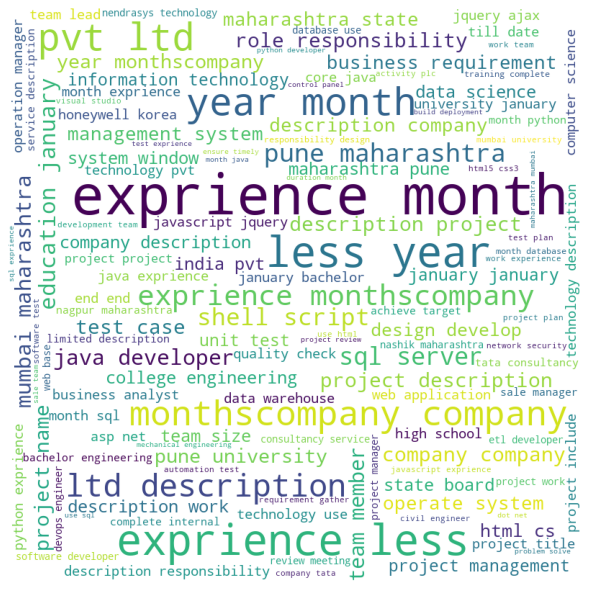

In [27]:
## Bilding a Word Cloud 
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['resume_processed']])
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [28]:
#Encoding
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
      df[i] = le.fit_transform(df[i])

In [29]:
df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [31]:
# Bag of words model
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(df.resume_processed).toarray()
y = df.Category.values
featureNames = tfidf.get_feature_names()

X, y

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
X_train.shape, X_test.shape

((769, 2500), (193, 2500))

In [33]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
#Feature Importance
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set:     0.98


In [43]:
from sklearn.metrics import classification_report
#print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
print(classification_report( y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         4
          12       0.80      1.00      0.89         8
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         8
          17       1.00    